In [42]:
import os
import pandas as pd


emotions = {
    1: 'calm', 2: 'happy', 3: 'sad',
    4: 'angry', 5: 'fearful', 6: 'disgust' , 7: 'surprised' , 8: 'neutral'
}

In [43]:

def extract_data_from_name(fname):
    parts = fname.split('.')[0].split('-')
    return {
        'filename': fname,
        'modality': int(parts[0]),
        'channel': int(parts[1]),  # 1 = speech, 2 = song
        'emotion_id': int(parts[2]),
        'emotion': emotions.get(int(parts[2]), 'unknown'),
        'intensity': int(parts[3]),
        'statement': int(parts[4]),
        'repeat': int(parts[5]),
        'actor': int(parts[6]),
        'gender': 'male' if int(parts[6]) % 2 != 0 else 'female'
    }

In [46]:
def create_dataframe(link):
    data = []
    for root, dirs, files in os.walk(link):
        for file in files:
            if file.endswith(".wav"):
                metadata = extract_data_from_name(file)
                metadata['path'] = os.path.join(root, file)
                data.append(metadata)
    return pd.DataFrame(data)
dataset_path = "/kaggle/input/training-data/training_data_mars"  
df = create_dataframe(dataset_path)

In [47]:
df.shape

(2452, 11)

In [48]:
df.sample(10)

,filename,modality,channel,emotion_id,emotion,intensity,statement,repeat,actor,gender,path
2223,03-01-03-02-01-02-03.wav,3,1,3,sad,2,1,2,3,male,/kaggle/input/training-data/training_data_mars...
1822,03-01-06-01-01-02-24.wav,3,1,6,disgust,1,1,2,24,female,/kaggle/input/training-data/training_data_mars...
2324,03-01-01-01-02-02-13.wav,3,1,1,calm,1,2,2,13,male,/kaggle/input/training-data/training_data_mars...
1812,03-01-08-01-02-02-24.wav,3,1,8,neutral,1,2,2,24,female,/kaggle/input/training-data/training_data_mars...
1277,03-01-02-02-01-02-21.wav,3,1,2,happy,2,1,2,21,male,/kaggle/input/training-data/training_data_mars...
722,03-02-06-01-01-02-19.wav,3,2,6,disgust,1,1,2,19,male,/kaggle/input/training-data/training_data_mars...
2241,03-01-04-01-01-02-03.wav,3,1,4,angry,1,1,2,3,male,/kaggle/input/training-data/training_data_mars...
663,03-02-06-01-02-02-04.wav,3,2,6,disgust,1,2,2,4,female,/kaggle/input/training-data/training_data_mars...
2018,03-01-02-02-01-01-19.wav,3,1,2,happy,2,1,1,19,male,/kaggle/input/training-data/training_data_mars...
2071,03-01-06-02-01-02-10.wav,3,1,6,disgust,2,1,2,10,female,/kaggle/input/training-data/training_data_mars...


In [51]:
df.isnull().sum()

filename      0
modality      0
channel       0
emotion_id    0
emotion       0
intensity     0
statement     0
repeat        0
actor         0
gender        0
path          0
dtype: int64

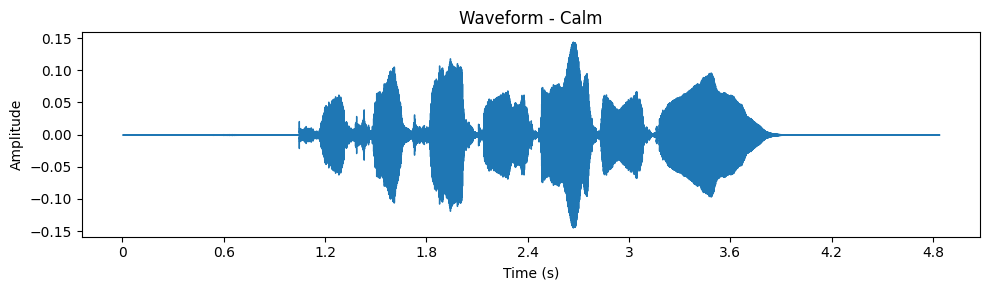

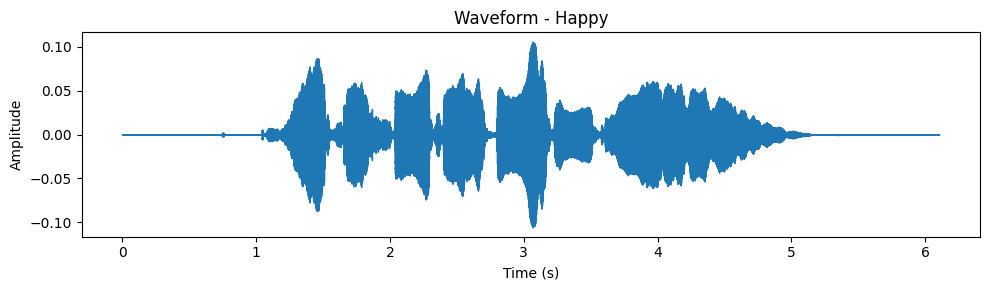

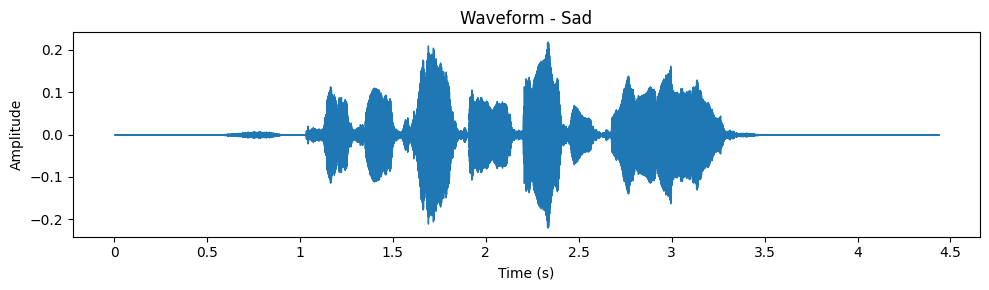

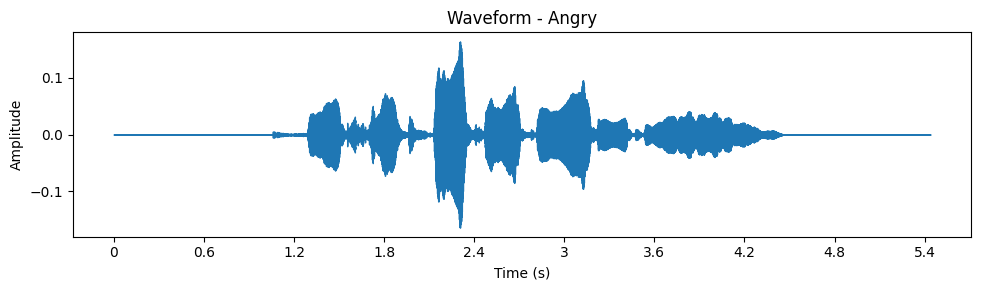

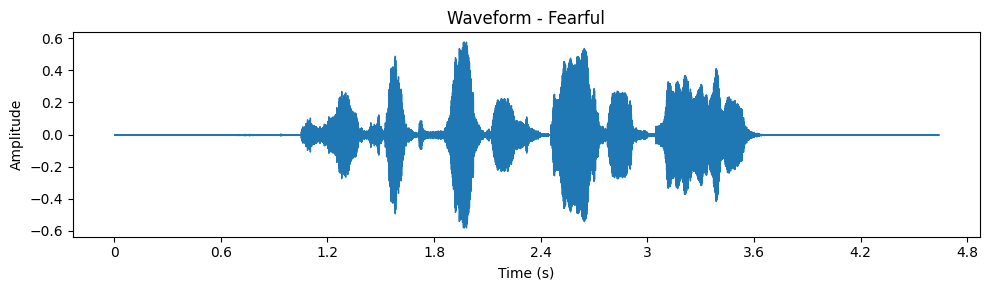

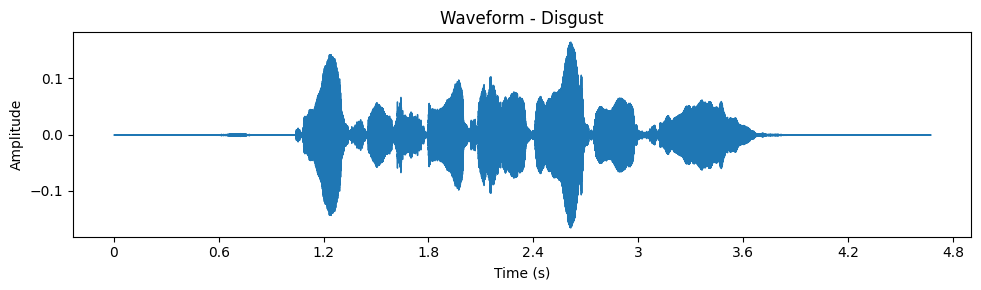

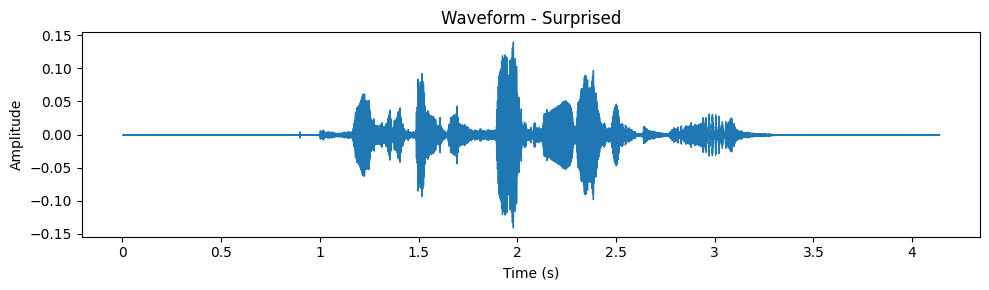

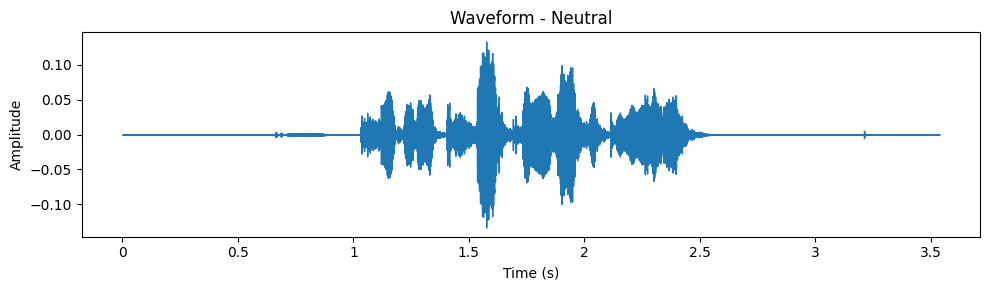

In [52]:

import librosa
import matplotlib.pyplot as plt 

for emotion in emotions.values():
    emotion_df = df[df['emotion'] == emotion]

    if not emotion_df.empty:
            row = emotion_df.iloc[0]  
            y, sr = librosa.load(row['path'], sr=None)

            plt.figure(figsize=(10, 3))
            librosa.display.waveshow(y, sr=sr)
            plt.title(f'Waveform - {emotion.capitalize()}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.tight_layout()
            plt.show()

In [53]:

df[['filename', 'emotion', 'path']].head()

,filename,emotion,path
0,03-02-05-02-01-01-02.wav,fearful,/kaggle/input/training-data/training_data_mars...
1,03-02-06-01-02-02-02.wav,disgust,/kaggle/input/training-data/training_data_mars...
2,03-02-03-02-01-02-02.wav,sad,/kaggle/input/training-data/training_data_mars...
3,03-02-03-01-02-02-02.wav,sad,/kaggle/input/training-data/training_data_mars...
4,03-02-04-02-01-01-02.wav,angry,/kaggle/input/training-data/training_data_mars...


In [54]:
def extract_mfcc(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)  # average across time
    return mfcc_scaled

In [55]:
import numpy as np
df['mfcc'] = df['path'].apply(extract_mfcc)

In [56]:
X = np.stack(df['mfcc'].values)

In [57]:

X.shape

(2452, 40)

In [58]:
print(df[['emotion', 'mfcc']].sample(20))

      emotion                                               mfcc
1326  fearful  [-338.97913, 44.90493, -24.296865, 3.9212265, ...
1464    happy  [-848.269, 58.99201, -5.404661, 14.093776, 5.1...
1223  fearful  [-563.2866, 49.648838, -6.105738, 10.458235, -...
1018    angry  [-683.2942, 59.915516, -0.3598153, 6.508976, -...
247       sad  [-574.91486, 88.777245, -18.899523, 11.786404,...
1075    happy  [-668.5879, 85.48602, 8.544578, 24.722446, 12....
1872  disgust  [-598.94604, 60.45143, -11.58842, 4.6506557, -...
1140  fearful  [-410.08502, 53.68095, -17.276892, 0.9002446, ...
216     angry  [-584.04266, 98.32402, -11.001643, 10.47951, 4...
1119  fearful  [-666.83655, 62.53264, 8.672487, 14.674374, 7....
961      calm  [-659.7117, 94.13579, -11.900971, 13.397871, 2...
1849    happy  [-765.3686, 55.468166, -0.9693126, 8.35543, -3...
1239  disgust  [-612.30835, 53.503334, -2.0079331, 10.402098,...
1189      sad  [-581.93896, 57.64692, -1.0170155, 10.131009, ...
680   fearful  [-472.4168

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['emotion'])   # convert string labels to numeric


In [60]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # stratify keeps emotion label proportions
)


In [61]:
!pip install tensorflow --quiet


In [62]:
# Reshape to (samples, height, width, channels) for 1D CNN
X_train_cnn = X_train[..., np.newaxis]  # shape: (num_train, 40, 1)
X_test_cnn = X_test[..., np.newaxis]    # shape: (num_test, 40, 1)


In [73]:
# After train-test split
# y_train is the output label vector (not one-hot)
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense, BatchNormalization

model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Dropout(0.3),
    Conv1D(256, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')  # 8 emotions
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 36, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 36, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 14, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 5, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,768 (616.28 KB)

 Trainable params: 157,384 (614.78 KB)

 Non-trainable params: 384 (1.50 KB)

In [76]:
history = model.fit(
    X_train_cnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_cnn, y_test)
)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.1947 - loss: 2.0194 - val_accuracy: 0.1365 - val_loss: 2.1920
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3217 - loss: 1.7217 - val_accuracy: 0.2159 - val_loss: 1.9632
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3457 - loss: 1.6813 - val_accuracy: 0.3686 - val_loss: 1.6690
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4049 - loss: 1.5720 - val_accuracy: 0.4684 - val_loss: 1.4449
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4433 - loss: 1.4793 - val_accuracy: 0.5010 - val_loss: 1.4457
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4748 - loss: 1.4273 - val_accuracy: 0.4562 - val_loss: 1.4091
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5146 - loss: 1.3332 - val_accuracy: 0.5601 - val_loss: 1.2349
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5186 - loss: 1.2867 - val_accuracy: 0.

In [77]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8215 - loss: 0.6572

Test Accuracy: 0.80


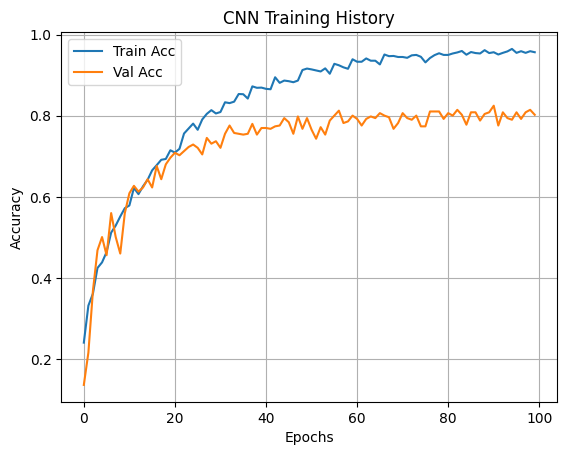

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("CNN Training History")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [79]:
# Predict class probabilities
y_pred_probs = model.predict(X_test_cnn)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [81]:
# Get emotion labels back from encoding
emotion_labels = le.classes_

# Print classification report
print(classification_report(y_test, y_pred, target_names=emotion_labels))


              precision    recall  f1-score   support

       angry       0.81      0.79      0.80        80
        calm       0.80      0.65      0.72        37
     disgust       0.75      0.84      0.79        74
     fearful       0.79      0.88      0.83        67
       happy       0.76      0.98      0.86        65
     neutral       0.85      0.67      0.75        49
         sad       0.93      0.71      0.81        79
   surprised       0.79      0.82      0.80        40

    accuracy                           0.80       491
   macro avg       0.81      0.79      0.79       491
weighted avg       0.81      0.80      0.80       491



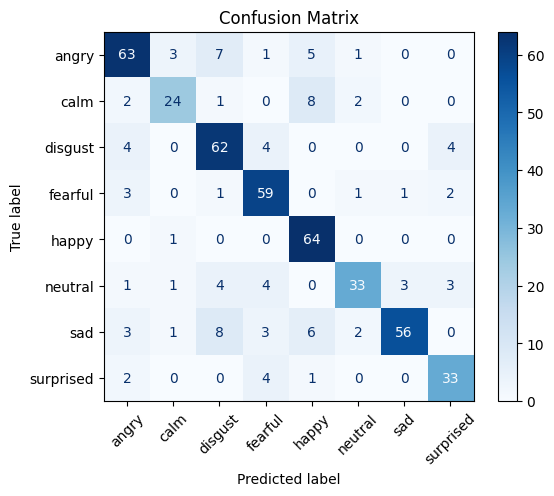

In [82]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [83]:
import pickle

# Save the trained CNN model
model.save("emotion_cnn_model.h5")  # HDF5 format, standard for Keras

# Save the LabelEncoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [84]:
from tensorflow.keras.models import load_model
import pickle

# Load your CNN model
model = load_model("emotion_cnn_model.h5")

# Load your label encoder
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)
